## Algoritmo KNN

El algoritmo KNN (K Nearest Neighbors) trata de buscar los K puntos más cercanos a un punto concreto para poder inferir su valor.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Tenemos la altura y el peso de cinco personas, junto con su respectivo género (Hombre o mujer).

In [2]:
data = {'Peso': [50, 80, 90, 50, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

df = pd.DataFrame(data)
df

,Peso,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,50,1.55,m
4,60,1.60,m


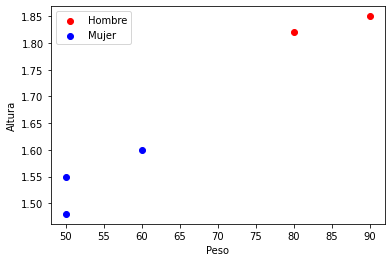

In [4]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Peso'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Peso'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

plt.xlabel("Peso")
plt.ylabel("Altura")
ax.legend();

Si nos dieran datos de una sexta persona, pero no nos dieran su género, ¿Podríamos adivinarlo de alguna forma?

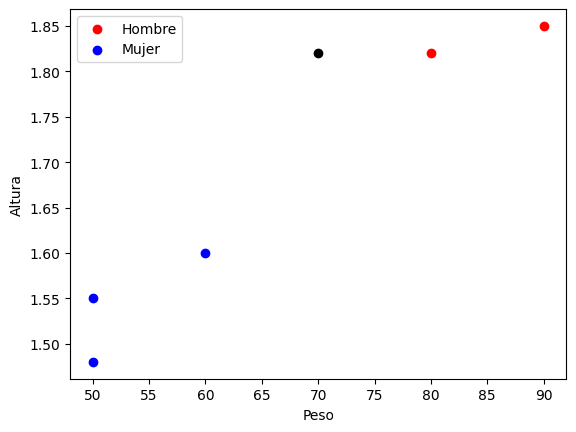

In [3]:
punto_nuevo = {'Peso': [70],
               'Altura': [1.82]}


punto_nuevo = pd.DataFrame(punto_nuevo)

ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Peso'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")

ax.scatter(df.loc[df['Genero'] == 'm', 'Peso'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

ax.scatter(punto_nuevo['Peso'],
           punto_nuevo['Altura'],
           c="black")
plt.xlabel("Peso")
plt.ylabel("Altura")
ax.legend();

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

X = df[['Peso', 'Altura']]
y = df['Genero']

knn.fit(X, y)

prediction = knn.predict(punto_nuevo)
print(prediction)

['m']


In [6]:
for i in range(1,6):
    print(i)

1
2
3
4
5


In [7]:
error_rate = []
# Will take some time
for i in range(1,6):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X,y)
 print(knn.predict(punto_nuevo))

['h']
['h']
['h']
['h']
['m']


C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [8]:
knn.classes_

array(['h', 'm'], dtype=object)

Documentacion: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [30]:
stan = StandardScaler()
X_stand = stan.fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2)

In [32]:
# Probamos hacer un GridSearch para definir cual es la mejor K

param = {'n_neighbors': list(range(3,10,2))}
modelo = KNeighborsClassifier()

gs = GridSearchCV(modelo, param, cv=2, scoring='roc_auc')
gs.fit(X_train, y_train)

c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _s

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='roc_auc')

In [33]:
gs.best_params_

{'n_neighbors': 3}

In [34]:
prediction = gs.best_estimator_.predict(X_test)

In [35]:
accuracy_score(y_test, prediction)

NameError: name 'accuracy_score' is not defined

In [ ]:
gs.best_score_

nan